In [8]:
import yt, json, glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

['halo_logs\\0_phoenix_256_IC1_RD0400-19.95_halo_stats.json', 'halo_logs\\0_phoenix_256_IC2_RD0400-19.95_halo_stats.json']
halo_rs_index
halo_mvir
halo_mgas
halo_mstar
halo_mmetal
halo_redshift
halo_rvir
halo_live_p3cnt
halo_remnant_p3cnt
halo_p2cnt
['halo_logs\\2_phoenix_256_IC1_RD0600-17.33_halo_stats.json', 'halo_logs\\2_phoenix_256_IC2_RD0600-17.33_halo_stats.json']
halo_rs_index
halo_mvir
halo_mgas
halo_mstar
halo_mmetal
halo_redshift
halo_rvir
halo_live_p3cnt
halo_remnant_p3cnt
halo_p2cnt
['halo_logs\\4_phoenix_256_IC1_RD0800-15.40_halo_stats.json', 'halo_logs\\4_phoenix_256_IC2_RD0800-15.40_halo_stats.json']
halo_rs_index
halo_mvir
halo_mgas
halo_mstar
halo_mmetal
halo_redshift
halo_rvir
halo_live_p3cnt
halo_remnant_p3cnt
halo_p2cnt
['halo_logs\\0_phoenix_256_IC2_RD1000-13.91_halo_stats.json', 'halo_logs\\1_phoenix_256_IC2_RD1000-13.91_halo_stats.json', 'halo_logs\\6_phoenix_256_IC1_RD1000-13.91_halo_stats.json']
halo_rs_index
halo_mvir
halo_mgas
halo_mstar
halo_mmetal
halo_reds

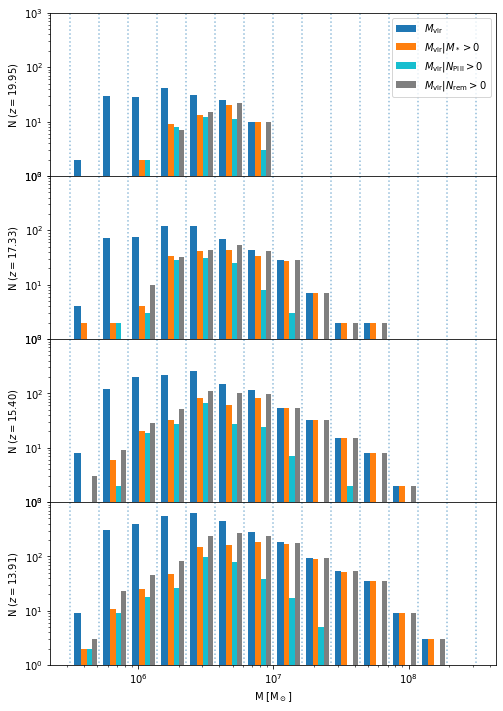

In [33]:
fig, ax = plt.subplots(4,1, sharex=True, figsize=[8,12])
bins = np.logspace(5.5, 8.5, 15)

for i, out in enumerate([400, 600, 800, 1000]):
    logfiles = glob.glob('halo_logs/*RD%04d*.json'%out)
    print(logfiles)
    with open(logfiles[0], 'r') as f:
        data = json.load(f)
    for n in range(1, len(logfiles)): # iterate rest of files to combine them all to one file
        with open(logfiles[n], 'r') as f:
            new = json.load(f)
        for k in data.keys():
            print(k)
            data[k] += new[k]

    mvir = np.array(data['halo_mvir'])
    mstar = np.array(data['halo_mstar'])
    mgalaxy = mvir[mstar > 0]
    p3gal = np.array(data['halo_live_p3cnt'])
    p3postgal = np.array(data['halo_remnant_p3cnt'])
    mp3r = mvir[p3postgal > 0]
    mp3 = mvir[p3gal > 0]

    mvir = mvir[mvir > 5e5]
    labels = ['$M_{\\rm vir}$', 
            '$M_{\\rm vir} | M_* > 0$',
            '$M_{\\rm vir} | N_{\\rm PIII} > 0$',
            '$M_{\\rm vir} | N_{\\rm rem} > 0$']
    colors = ['tab:blue','tab:orange','tab:cyan','tab:gray']
    pdata = [mvir, mgalaxy, mp3, mp3r]
    _, hist, _ = ax[i].hist(pdata, bins=bins, label=labels, color=colors)
    maxx = max(hist)
    ax[i].vlines(bins, 0, 1e4, linestyles='dotted', alpha=0.5)
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].set_ylabel('N ($z=$%0.2f)'%data['halo_redshift'][0])
    ax[i].set_ylim(1,1e3)

plt.subplots_adjust(hspace=0.0)
ax[0].legend()
ax[-1].set_xlabel('M [M$_\odot]$')
plt.savefig('./images/phx256-1_halodist.pdf', bbox_inches='tight')